In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv('diabetes_dataset.csv')

In [91]:
# print first 5 rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [92]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
# check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_as_missing] = df[zero_as_missing].replace(0, np.nan)

print(df.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [95]:
# check datatypes
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [96]:
# correct datatypes if necessary
df['Pregnancies'] = df['Pregnancies'].astype('int64')

In [97]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

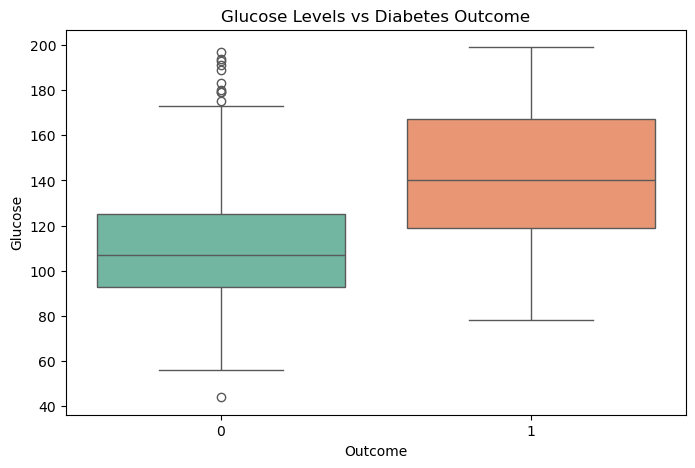

In [98]:
# 1. Glucose vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set2")
plt.title("Glucose Levels vs Diabetes Outcome")
plt.show()

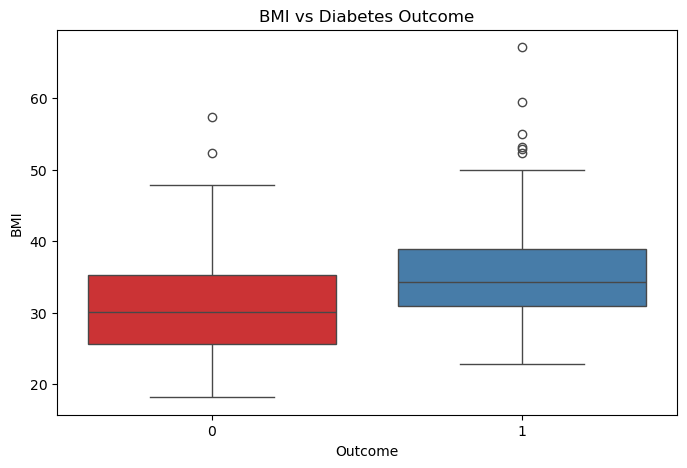

In [99]:
# 2. BMI vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="BMI", data=df, palette="Set1")
plt.title("BMI vs Diabetes Outcome")
plt.show()


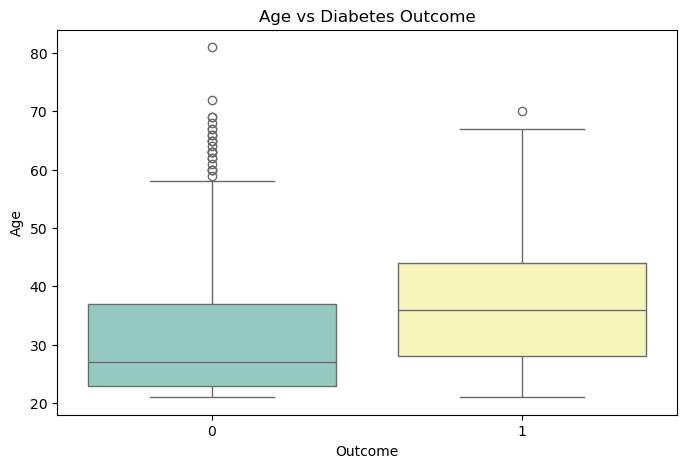

In [100]:
# 3. Age vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Age", data=df, palette="Set3")
plt.title("Age vs Diabetes Outcome")
plt.show()

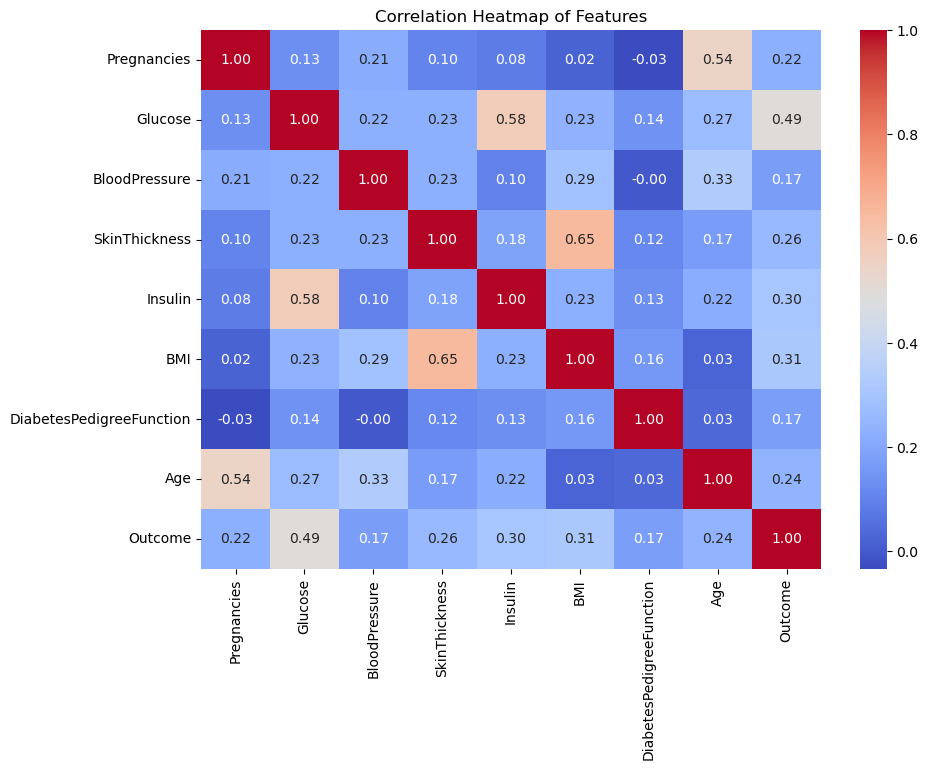

In [101]:
# 4. Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [102]:
fig = px.pie(
    df, names='Outcome', 
    color='Outcome',
    title='Distribution of Diabetes Outcome',
    color_discrete_map={1: 'red', 0: 'blue'},
    width=500, height=500
)
fig.show()

In [103]:
for column in df.drop("Outcome",axis=1).columns[:5]:
    # for loop auto iterates through the first five feature columns in the dataframe
    fig = px.box(data_frame =df ,
                 x='Outcome',
                 color = 'Outcome',
                 y = column,
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')

    fig.show()

In [104]:
for column in df.drop("Outcome",axis=1).columns[5:10]:
    # for loop auto iterates through the first five feature columns in the dataframe
    fig = px.scatter(data_frame =df ,
                 x=column,
                 color = 'Outcome',
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')

    fig.show()

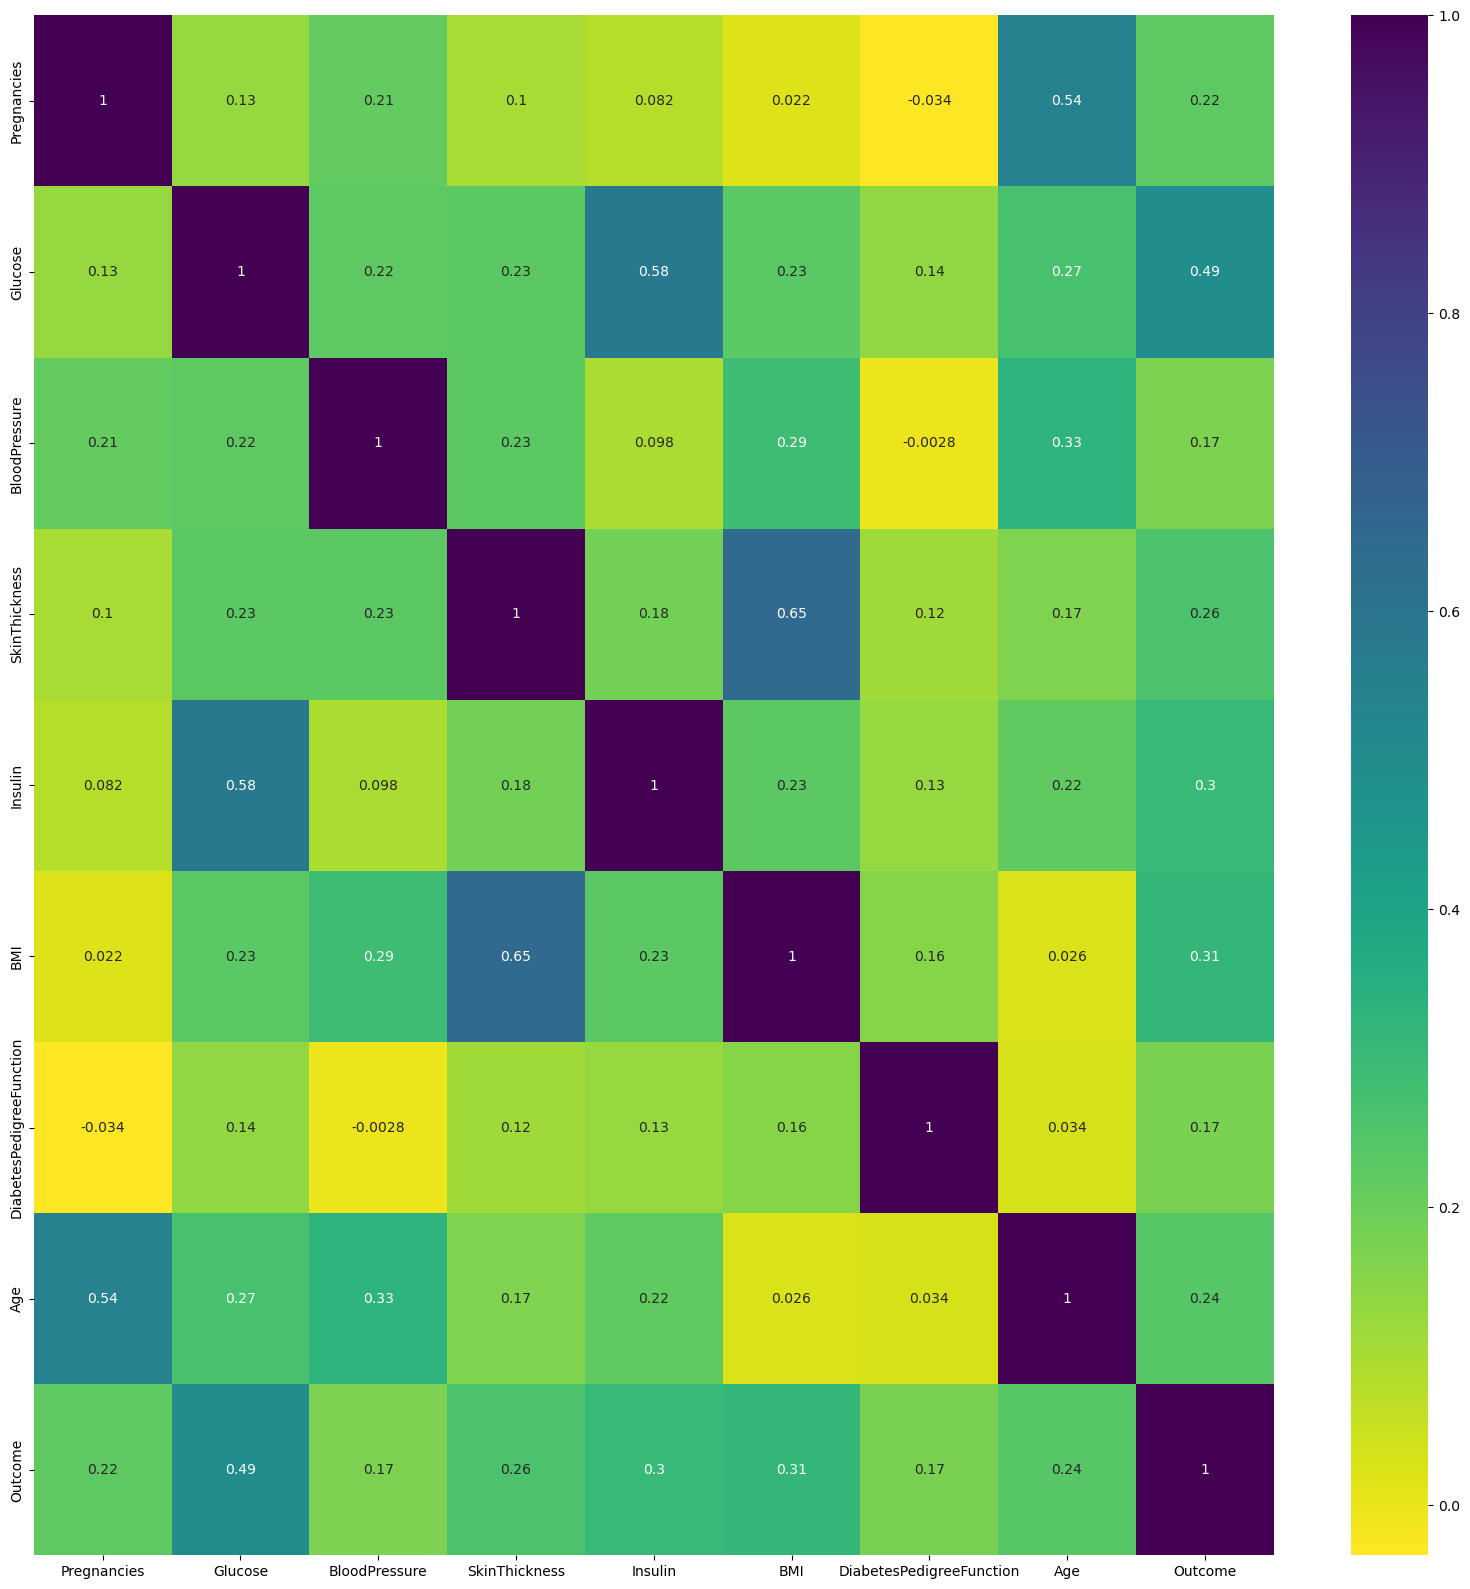

In [105]:
corr = df.corr()

plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap='viridis_r' , annot=True)

plt.show()

Feature Selection

In [106]:
import pprint

cor_target = abs(corr['Outcome'])

# select better correlated features
relevant_features = cor_target[cor_target > 0.25]

# list comprehension
names = [index for index,value in relevant_features.items()]

# Drop the target vairable from the results
names.remove("Outcome")

pprint.pprint(names)

['Glucose', 'SkinThickness', 'Insulin', 'BMI']


Assigning Training data and labels

In [107]:
X = df[names].values
y = df['Outcome'].values.reshape(-1, 1)

print("Features ",X.shape, "Labels ",y.shape)

Features  (768, 4) Labels  (768, 1)


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
display(X)

array([[ 0.86228736,  0.55855696,         nan,  0.16509656],
       [-1.20222881, -0.01465704,         nan, -0.84640379],
       [ 2.0092408 ,         nan,         nan, -1.32325395],
       ...,
       [-0.02250528, -0.58787104, -0.36710822, -0.90420381],
       [ 0.14134521,         nan,         nan, -0.34065362],
       [-0.94006803,  0.17641429,         nan, -0.2973036 ]])

In [109]:
'''def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Avoid division by zero
    std[std == 0] = 1  

    return (X - mean) / std

X = scale(X)
display(X)
'''
# issue with scaling: divided by zero

'def scale(X):\n    mean = np.mean(X, axis=0)\n    std = np.std(X, axis=0)\n\n    # Avoid division by zero\n    std[std == 0] = 1  \n\n    return (X - mean) / std\n\nX = scale(X)\ndisplay(X)\n'

In [110]:
class Node:
    '''
    A class representing a Node in a Decision Tree.
    '''
    def __init__(self, feature=None, threshold=None, left=None, right=None,gain = None, value=None):
        '''
        Initializes a Node.

        Parameters:
        - feature: The index of the feature to split on.
        - threshold: The threshold value for the split. Defaults to None
        - left: The left child Node. Defaults to None
        - right: The right child Node. Defaults to None
        - value: The class label if it's a leaf node.

        '''
        # Initialize the Node with the given parameters
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value   

In [111]:
class DesicionTree:
    '''
    This is a decision tree classifier.
    It builds a decision tree from the training data.
    It can predict the class label for new data points.
    '''
    
    def __init__(self, min_samples = 2, max_depth = 3):
        self.min_samples = min_samples
        self.max_depth = max_depth
        
    
    def split(self, dataset, feature, threshold):
        '''
        Splits the dataset into two subsets based on the feature and threshold.
        
        Parameters:
        - dataset: The dataset to split
        - feature: The index of the feature to split on
        - threshold: The threshold value for the split
        
        Returns:
        - left: The left subset of the dataset with values less than the threshold
        - right: The right subset of the dataset with values greater than or equal to the threshold
        '''
        
        left_dataset = []
        right_dataset = []
        # Iterate through each row in the dataset
        for row in dataset:
            # If the value of the feature is less than the threshold, add it to the left subset
            if row[feature] < threshold:
                left_dataset.append(row)
            # Otherwise, add it to the right subset
            else:
                right_dataset.append(row)
                
        # Convert the left dataset and right dataset to numpy arrays
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        
        return left_dataset, right_dataset


# write function to calculate Entropy
    def entropy(self, y):
        '''
        Calculates the entropy of the class labels.
        Entropy is a measure of the uncertainty in the class labels.
        Entropy suggests impurity or disorder in the dataset.
        
        Parameters:
        - y: The class labels of the dataset
        
        Returns:
        - entropy: The entropy of the class labels
        '''
        
        entropy = 0.0
        
        # use numpy's unique function to get the unique class labels and their counts
        labels = np.unique(y)
        
        for label in labels:
            
            # find examples in y that match the current label
            # this will give us the examples that belong to the current label
            # we will use this to calculate the probability of the current label
            label_examples = y[y == label]
            
            # calculate the ratio of current labe in y
            pl = len(label_examples) / len(y)
            
            # calculate the entropy for the current label and ratio
            entropy += -pl * np.log2(pl) if pl > 0 else 0
            # (pl > 0) this is to avoid log(0) which is undefined
            
            return entropy
    
# write function to calculate Gini Index / Information Gain
    def gini_index(self, parent, left, right):
        '''
        Calculates the Gini Index of the class labels.
        Gini Index is a measure of impurity in the class labels.
        Computes the information gain from splitting the parent dataset into two subsets.
        
        Parameters:
        parent(ndarray): Input parent dataset
        left : left subset of the dataset
        right : right subset of the dataset
        
        Returns:
        - gini: The Gini Index of the class labels
        '''
        
        # Initialize the information gain to 0
        information_gain = 0.0
        
        # compute the entropy of the parent dataset
        parent_entropy = self.entropy(y)
        
        # weights for the left and right subsets
        weight_left = len(left) / len(parent)
        weight_right = len(right) / len(parent)
        
        # calculate the entropy of the left and right datasets/nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        
        # calculate weighted entropy
        # weighted entropy = post split entropy
        # weighted entropy is the sum of the weighted entropies of the left and right subsets
        # where the weights are the proportion of examples in each subset
        weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)
        
        # calculate the information gain
        # information gain = pre split entropy - post split entropy
        information_gain = parent_entropy - weighted_entropy
        
        return information_gain
    
    # write function to get the best split
def best_split(self, dataset, num_samples, num_features):
    '''
    Finds the best feature and threshold to split the dataset.
    
    Parameters:
    - dataset: The dataset to split
    - num_samples: The number of samples in the dataset
    - num_features: The number of features in the dataset
    
    Returns:
    dict: A dictionary containing the best feature index, threshold value, and information gain
    '''
    best_split = {'gain': -1, 'feature': None, 'threshold': None}

    # loop over all features
    for feature_index in range(num_features):
        # get all unique values of the feature
        thresholds = np.unique(dataset[:, feature_index])
        
        for threshold in thresholds:
            # split the dataset based on the current feature and threshold
            left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
            
            # if either subset is empty, skip this split
            if len(left_dataset) == 0 and len(right_dataset) == 0:
            # get y values of the parent and right, left nodes
                y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                # compute information gain based on the y values
                information_gain = self.information_gain(y, left_y, right_y)
                # update the best split if conditions are met
            
            # if this gain is better than the best gain found so far, update the best gain and corresponding feature and threshold
            if information_gain > best_split['gain']:
                best_split['gain'] = information_gain
                best_split['feature'] = feature_index
                best_split['threshold'] = threshold
                best_split['left'] = left_dataset
                best_split['right'] = right_dataset
    return best_split

def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key = y.count)
        return most_occuring_value
def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)
        
def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)
    

In [112]:
# Evaluation Metrics

def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0] # rows are samples

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [113]:
def accuracy(self, y_true, y_pred):
        """
        Calculates the accuracy of the predictions.

        Args:
            y_true (list): The true class labels.
            y_pred (list): The predicted class labels.

        Returns:
            float: The accuracy of the predictions as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        
        # Calculate the number of correct predictions
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)
        

In [114]:
def balanced_accuracy(y_true, y_pred):
    """Calculate the balanced accuracy for a multi-class classification problem.

    Parameters
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns
    -------
        balanced_acc : The balanced accuracyof the model

    """
    y_pred = np.array(y_pred)
    y_true = y_true.flatten()
    # Get the number of classes
    n_classes = len(np.unique(y_true))

    # Initialize an array to store the sensitivity and specificity for each class
    sen = []
    spec = []
    # Loop over each class
    for i in range(n_classes):
        # Create a mask for the true and predicted values for class i
        mask_true = y_true == i
        mask_pred = y_pred == i

        # Calculate the true positive, true negative, false positive, and false negative values
        TP = np.sum(mask_true & mask_pred)
        TN = np.sum((mask_true != True) & (mask_pred != True))
        FP = np.sum((mask_true != True) & mask_pred)
        FN = np.sum(mask_true & (mask_pred != True))

        # Calculate the sensitivity (true positive rate) and specificity (true negative rate)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Store the sensitivity and specificity for class i
        sen.append(sensitivity)
        spec.append(specificity)
    # Calculate the balanced accuracy as the average of the sensitivity and specificity for each class
    average_sen =  np.mean(sen)
    average_spec =  np.mean(spec)
    balanced_acc = (average_sen + average_spec) / n_classes

    return balanced_acc

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [116]:
# sklearn implementation 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier model object.
decision_tree_classifier = DecisionTreeClassifier()

# Train the decision tree classifier model using the training data.
decision_tree_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = decision_tree_classifier.predict(X_test)

# Calculate evaluating metrics
print(f" Model's Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy(y_test, predictions)}")

 Model's Accuracy: 0.673202614379085
Model's Balanced Accuracy: 0.6371985157699442


Model Evaluation Metrics
Accuracy:            0.7208
Balanced Accuracy:   0.6785
Precision:           0.6170
Recall (Sensitivity):0.5370
F1-score:            0.5743
ROC AUC:             0.7796

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154



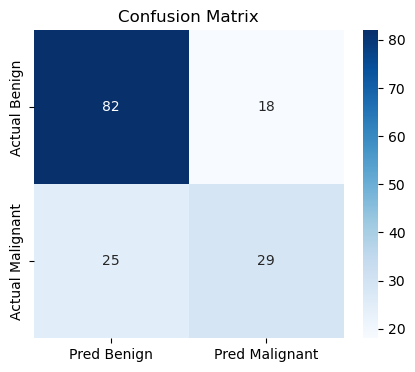

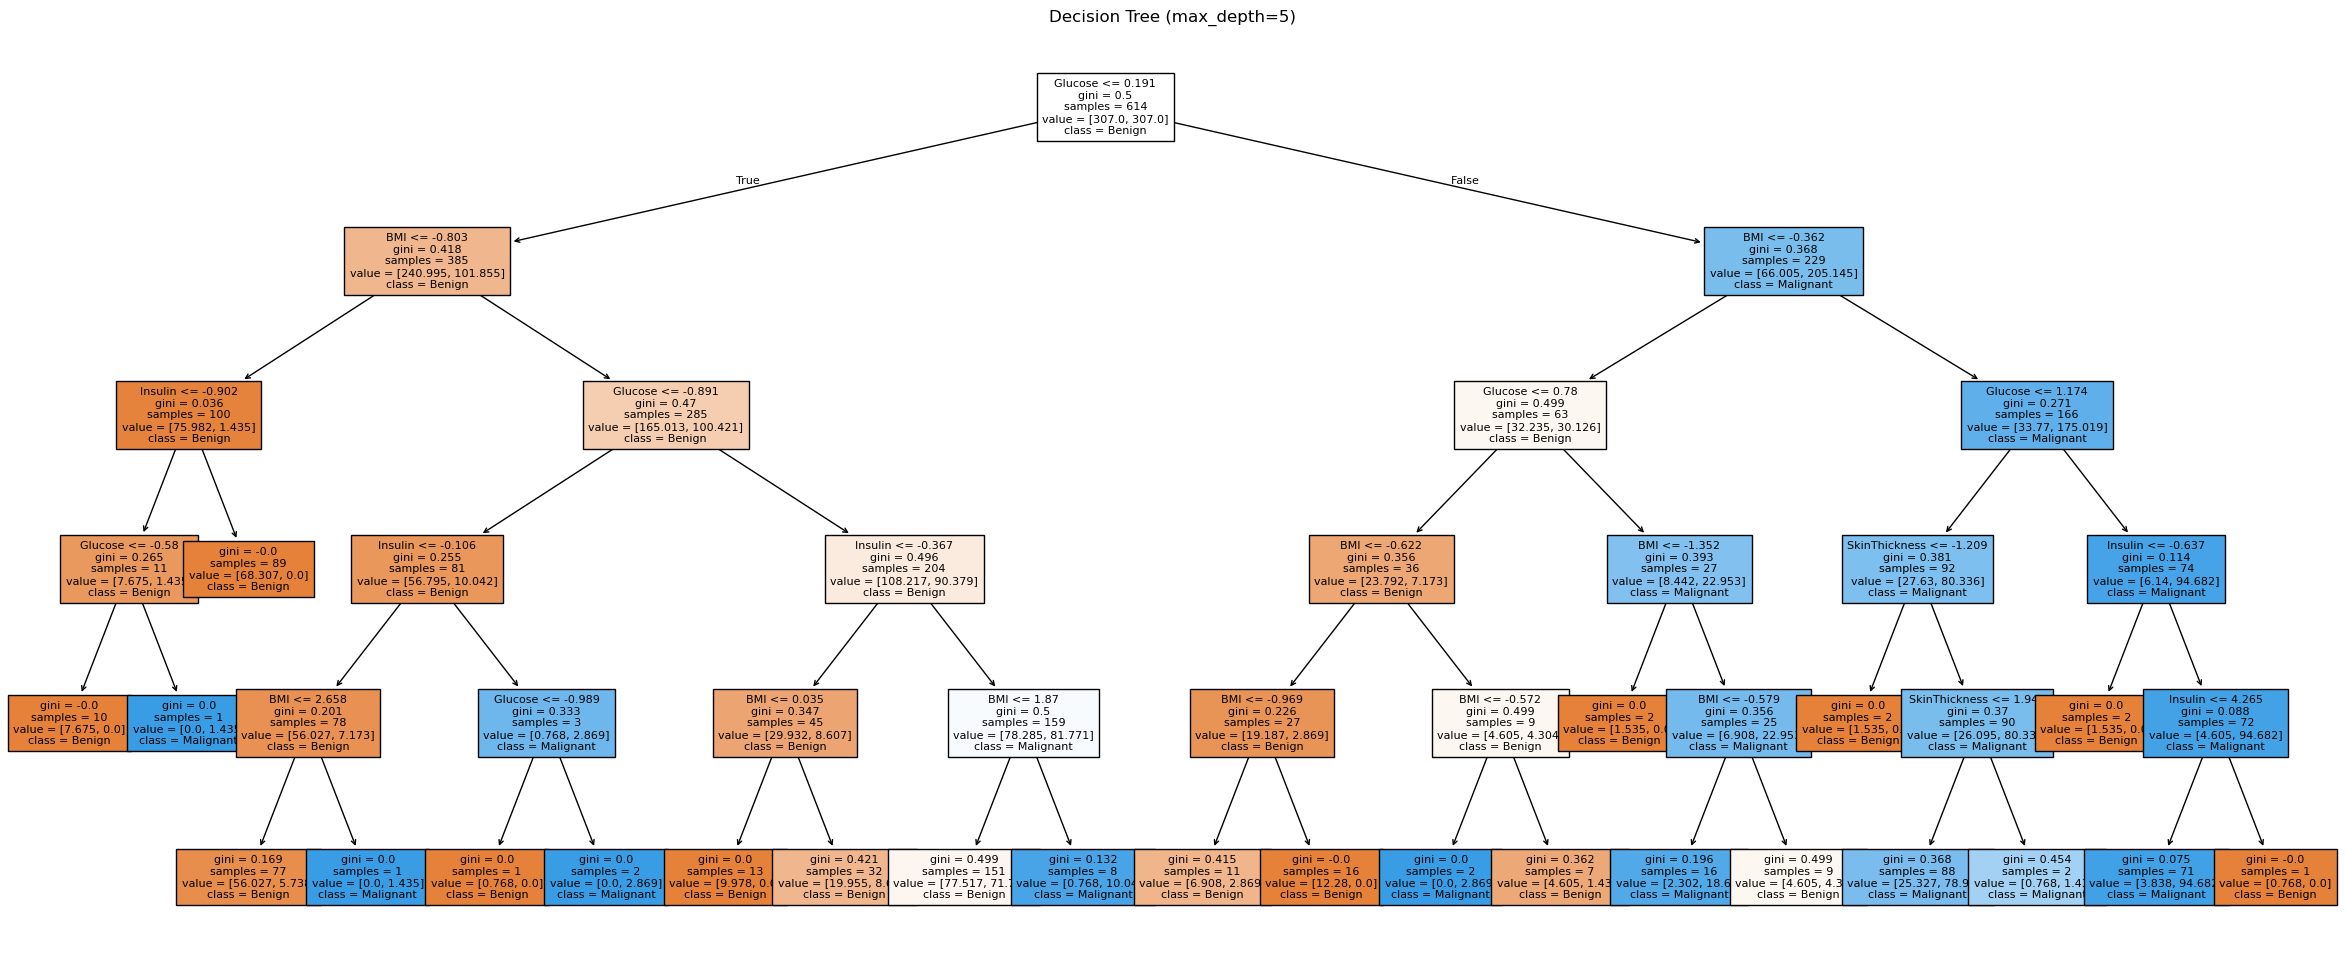

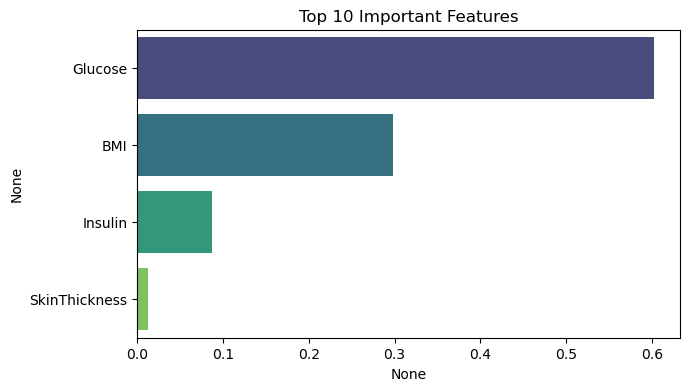

In [117]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, 
    precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 1. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 2. Train Decision Tree
# ===============================
clf = DecisionTreeClassifier(
    max_depth=5,           # limit depth to avoid overfitting
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)

# ===============================
# 3. Predictions
# ===============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # for ROC AUC

# ===============================
# 4. Evaluation Metrics
# ===============================
print("Model Evaluation Metrics")
print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"Precision:           {precision_score(y_test, y_pred):.4f}")
print(f"Recall (Sensitivity):{recall_score(y_test, y_pred):.4f}")
print(f"F1-score:            {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:             {roc_auc_score(y_test, y_proba):.4f}")

print("\nClassification Report")
print(classification_report(y_test, y_pred))

# ===============================
# 5. Confusion Matrix Visualization
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Benign','Pred Malignant'],
            yticklabels=['Actual Benign','Actual Malignant'])
plt.title("Confusion Matrix")
plt.show()

# ===============================
# 6. Visualize Decision Tree
# ===============================
plt.figure(figsize=(30,12))
plot_tree(
    clf, 
    filled=True, 
    feature_names=names, 
    class_names=['Benign','Malignant'],
    fontsize=8
    )
plt.title("Decision Tree (max_depth=5)")
plt.show()

# ===============================
# 7. Feature Importances
# ===============================
importances = pd.Series(clf.feature_importances_, index=names)
importances = importances.sort_values(ascending=False)[:10]  # top 10

plt.figure(figsize=(7,4))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Top 10 Important Features")
plt.show()


Inferences
* Glucose is consistently the strongest single predictor.
* Higher BMI is associated with diabetes.
* Older age and more pregnancies increase risk, but their effects are secondary to Glucose/BMI.
* Treating zeros in Glucose/BMI/etc. as missing avoids misleading the tree.